In [19]:
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('train.csv')

In [20]:
dataset.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [21]:
dataset.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [22]:
sentiment = dataset['comment_text'].values
y_list = ["toxic","severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = dataset[y_list].values
sentiment

array(["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",
       "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)",
       "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",
       ...,
       'Spitzer \n\nUmm, theres no actual article for prostitution ring.  - Crunch Captain.',
       'And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.',
       '"\nAnd ... I really don\'t think you understand.  I came here and my idea was bad right away.  What kind of communit

In [23]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(list(sentiment))

In [24]:
from keras.preprocessing import text, sequence

seq = tokenizer.texts_to_sequences(sentiment)
pad = sequence.pad_sequences(seq, maxlen=100)

In [25]:
test = pd.read_csv('test.csv')
test = test['comment_text'].values
test_seq = tokenizer.texts_to_sequences(test)
test_pad = sequence.pad_sequences(test_seq, maxlen=100)

In [26]:
def plot_history(history):
	  # plot loss
    plt.title('Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='red', label='test')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()
    
    # plot accuracy
    plt.title('Accuracy')
    plt.plot(history.history['categorical_accuracy'], color='blue', label='train')
    plt.plot(history.history['val_categorical_accuracy'], color='red', label='test')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()

In [28]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers


def model_add():
    inputs = Input(shape=(100, ))
    x = Embedding(20000, 128)(inputs)
    x = (LSTM(50))(x)
    x = Dropout(0.1)(x)
    x = Dense(50, activation="relu")(x)
    x = Dropout(0.1)(x)
    outputs = Dense(6, activation="sigmoid")(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss='mean_squared_error',
                  optimizer='adam',
                  metrics=['categorical_accuracy'])
    return model
model = model_add()
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                35800     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 306 

Epoch 1/10
4488/4488 [==============================] - 130s 29ms/step - loss: 0.0120 - categorical_accuracy: 0.9897 - val_loss: 0.0141 - val_categorical_accuracy: 0.9939
Epoch 2/10
4488/4488 [==============================] - 130s 29ms/step - loss: 0.0105 - categorical_accuracy: 0.9813 - val_loss: 0.0142 - val_categorical_accuracy: 0.9897
Epoch 3/10
4488/4488 [==============================] - 130s 29ms/step - loss: 0.0092 - categorical_accuracy: 0.9790 - val_loss: 0.0147 - val_categorical_accuracy: 0.9911
Epoch 4/10
4488/4488 [==============================] - 130s 29ms/step - loss: 0.0080 - categorical_accuracy: 0.9698 - val_loss: 0.0150 - val_categorical_accuracy: 0.9826
Epoch 5/10
4488/4488 [==============================] - 130s 29ms/step - loss: 0.0071 - categorical_accuracy: 0.8686 - val_loss: 0.0160 - val_categorical_accuracy: 0.9714
Epoch 6/10
4488/4488 [==============================] - 129s 29ms/step - loss: 0.0065 - categorical_accuracy: 0.8114 - val_loss: 0.0161 - val_cat

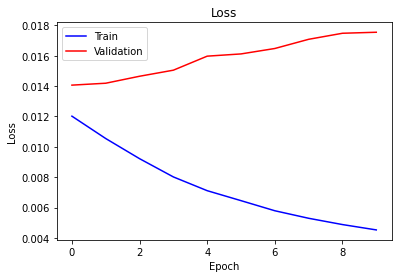

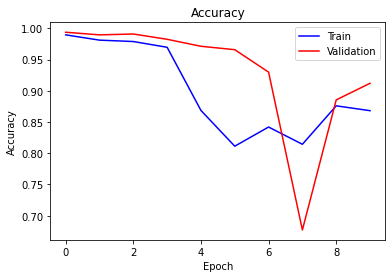

In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early = EarlyStopping(monitor="val_loss", mode="min", patience=20)
model_his = model.fit(pad, y, batch_size=32, epochs=10, validation_split=0.1, callbacks=early)
 
plot_history(model_his)

In [30]:
y_test = model.predict([test_pad], batch_size=1024, verbose=1)
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission[y_list] = y_test
sample_submission.to_csv('submission.csv', index=False)

150/150 [==============================] - 3s 16ms/step
